
# Serie A Data Visualization Project

This project analyzes Serie A football data through a series of visualizations.  
The goal is to provide insights into team performance, shooting efficiency, possession, and expected goals (xG) metrics.  
Each chart highlights a specific relationship or pattern that helps us better understand the dynamics of the league.

---


### Serie A Analysis Project

### Project Description:
This project analyzes the performance of Serie A teams using data from one season. We explore team results, offensive and defensive efficiency, expected vs real goals, possession, and other key metrics. The visualizations aim to provide insights into team performance, efficiency, and playing style.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In order to do some graphic analysis we need to import the dataset that will be used. We are going to use the .csv file named "summary_2024-2025" that contains the summary of the 2024-2025 Serie A season. Before we dive into analysis, the file contains some columns that are not useful for our purposes today, so we must drop them.

In [3]:
df = pd.read_csv("Seasons_data/summary_2024-2025.csv")
df = df.drop(columns=['Season', 'Matches_Played', 'Total_FK',
    'Total_PK_Attempted', 'Total_PK_Scored', 'Win_Percentage',
    'Draw_Percentage', 'Loss_Percentage'])
season = '2024-2025'

### Correlation Matrix
This chart shows the correlation between multiple performance metrics in Serie A. The goal is to identify which variables are strongly related, such as goals, possession, points, or xG.

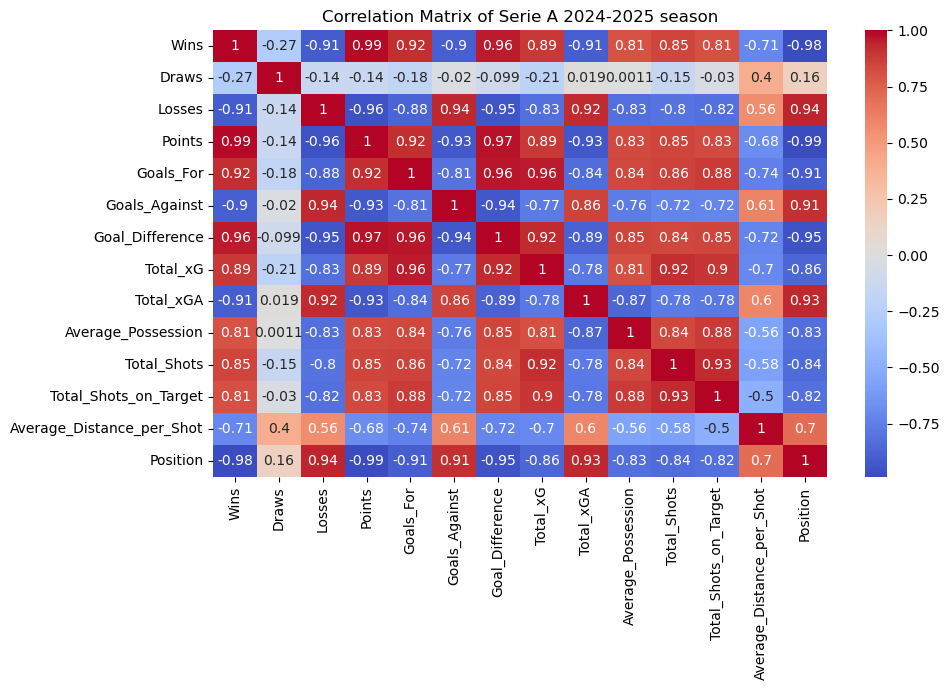

In [4]:
df_no_team = df.drop(columns=['Team'])
corr_matrix = df_no_team.corr()
   
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix of Serie A {season} season")
   
plt.tight_layout()
plt.show()
#plt.savefig(f"Plots/Correlation Matrix of Serie A {season} season.png")

The heatmap reveals clear relationships, such as a strong positive correlation between points, wins, and goal difference, and a negative correlation with losses.

### Wins, Draws and Losses
This bar chart shows the distribution of wins, draws, and losses for each team. The objective is to compare team performance in terms of match outcomes.

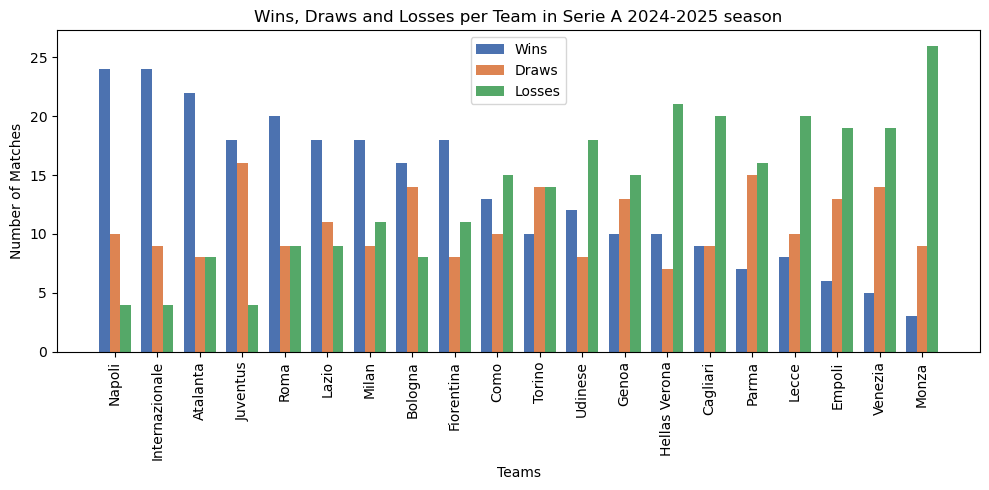

In [5]:
Teams = df['Team']
Wins = df['Wins']
Draws = df['Draws']
Losses = df['Losses']

x = np.arange(len(Teams)) 
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)

ax.bar(x - width, Wins, width, label="Wins", color="#4c72b0")       
ax.bar(x, Draws, width, label="Draws", color="#dd8452")            
ax.bar(x + width, Losses, width, label="Losses", color="#55a868")

ax.set_xlabel("Teams")
ax.set_ylabel("Number of Matches")
ax.set_title(f"Wins, Draws and Losses per Team in Serie A {season} season")
ax.set_xticks(x)
ax.set_xticklabels(Teams, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
#plt.savefig(f'Plots/Wins, Draws and Losses per Team in Serie A {season} season.png')

Teams at the top of the table display significantly more wins, while lower-ranked teams accumulate more losses. Draws are more evenly distributed.

### Goal Difference vs xG Difference

This chart highlights those teams who overperformed or underperformed during the season. Performance is measured in the difference between goal difference and xG goal difference. Operferforming means that a team's real goal difference is higher than the expected one, underperforming means exactly the opposite. If a dot is under the line it means that the team underperformed, viceversa for the dots over the line.

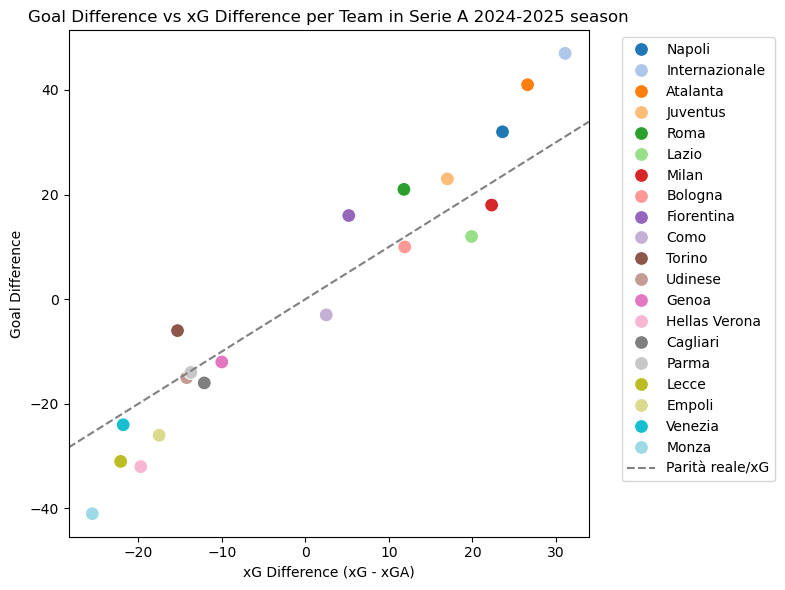

In [6]:
Expected_goals = df['Total_xG']
Expected_goals_against =  df['Total_xGA']
df['xG_Diff'] = Expected_goals- Expected_goals_against
Expected_goals_difference = df['xG_Diff']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='xG_Diff', y='Goal_Difference', hue='Team', s=100, palette='tab20')

plt.axline((0,0), slope=1, color='grey', linestyle='--', label='Parità reale/xG')
plt.xlabel("xG Difference (xG - xGA)")
plt.ylabel("Goal Difference")
plt.title(f"Goal Difference vs xG Difference per Team in Serie A {season} season")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#plt.savefig(f'Plots/Goal Difference vs xG Difference per Team in Serie A {season} season.png')

We can see that the best overperformer is Internazionale and the best underperformer is Monza. We'll see later more details.

### Points and Possession
This chart compares team points with average possession. The aim is to explore whether teams with higher ball possession also accumulate more points.

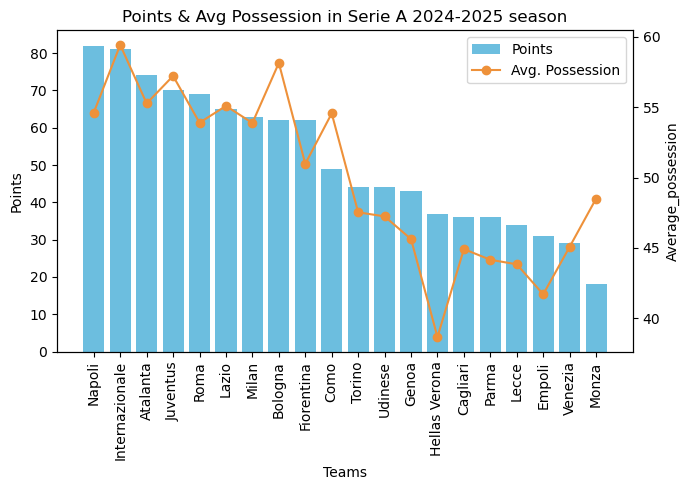

In [7]:
Points = df['Points']
Average_possession = df['Average_Possession']

fig, ax1 = plt.subplots(figsize=(7,5))
plt.xticks(rotation=90)

ax1.bar(Teams, Points, color="#6cbedf", label='Points')
ax1.set_xlabel('Teams')
ax1.set_ylabel('Points')
ax1.set_title(f'Points & Avg Possession in Serie A {season} season')

ax2 = ax1.twinx()
ax2.plot(Teams, Average_possession, color="#ee913a", marker='o', label="Avg. Possession")
ax2.set_ylabel("Average_possession")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()
#plt.savefig(f"Plots/Points & Avg Possession in Serie A {season} season.png")

We notice a pretty strong correlation between average possession and points. As we have seen earlier in the correlation charts the value is 0.83. Hellas Verona and Monza are clearly outlier but their data are the perfect example that ball possession isn't everything in football.

### Possession and Goals
This chart analyzes the relationship between average possession and goals scored/conceded. The goal is to evaluate whether possession impacts attacking and defensive outcomes.

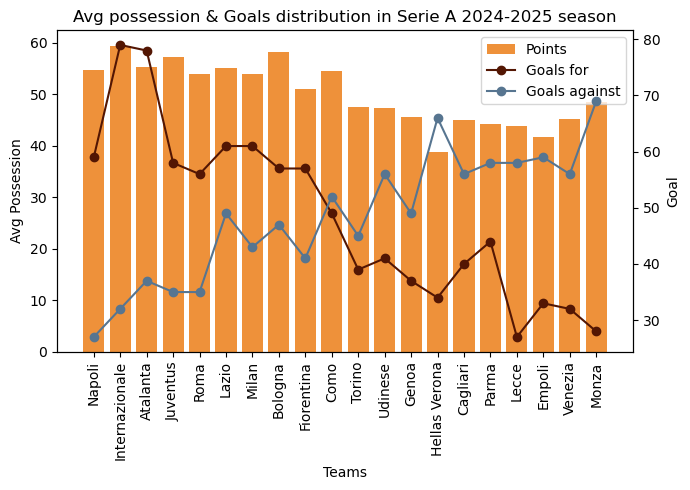

In [ ]:
Goals_for = df['Goals_For']
Goals_against = df['Goals_Against']

fig, ax1 = plt.subplots(figsize=(7,5))
plt.xticks(rotation=90)

ax1.bar(Teams, Average_possession, color="#ee913a", label='Avg possession')
ax1.set_xlabel('Teams')
ax1.set_ylabel('Avg Possession')
ax1.set_title(f'Avg possession & Goals distribution in Serie A {season} season')

ax2 = ax1.twinx()
ax2.plot(Teams, Goals_for, color="#531603", marker='o', label="Goals for")
ax2.plot(Teams, Goals_against, color='#577590', marker='o', label="Goals against")
ax2.set_ylabel("Goal")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
#plt.savefig(f'Plots/Avg possession & Goals distribution in Serie A {season} season.png')
plt.show()

The chart shows that high possession does not always guarantee scoring more goals, but it often correlates with better defensive stability.

### Points vs Goal Difference
This scatter plot compares points with goal difference. The objective is to test the strength of the relationship between results and scoring balance.

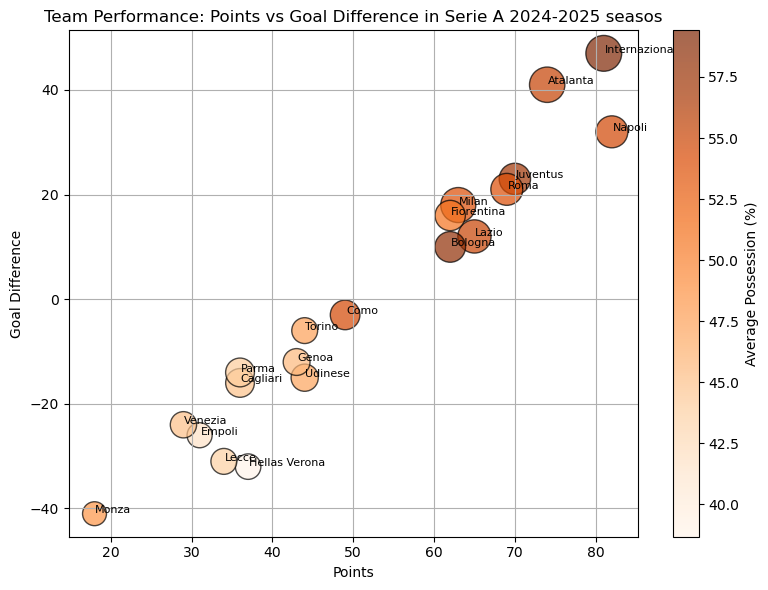

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    Points,
    df['Goal_Difference'],
    s=Expected_goals*10, 
    c=Average_possession,       
    cmap='Oranges',
    alpha=0.7,
    edgecolor='k'
)

plt.xlabel("Points")
plt.ylabel("Goal Difference")
plt.title(f"Team Performance: Points vs Goal Difference in Serie A {season} season")
plt.colorbar(scatter, label='Average Possession (%)')

for i, team in enumerate(df['Team']):
    plt.text(df['Points'][i]+0.1, df['Goal_Difference'][i]+0.1, team, fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()
#plt.savefig(f'Plots/Team Performance in Serie A {season} season.png')

As expected, there is a strong positive relationship: teams with a higher goal difference usually achieve more points.

### Team Efficiency Overview
This combined chart summarizes multiple metrics (shooting accuracy, xG overperformance, possession). The objective is to compare overall team efficiency.

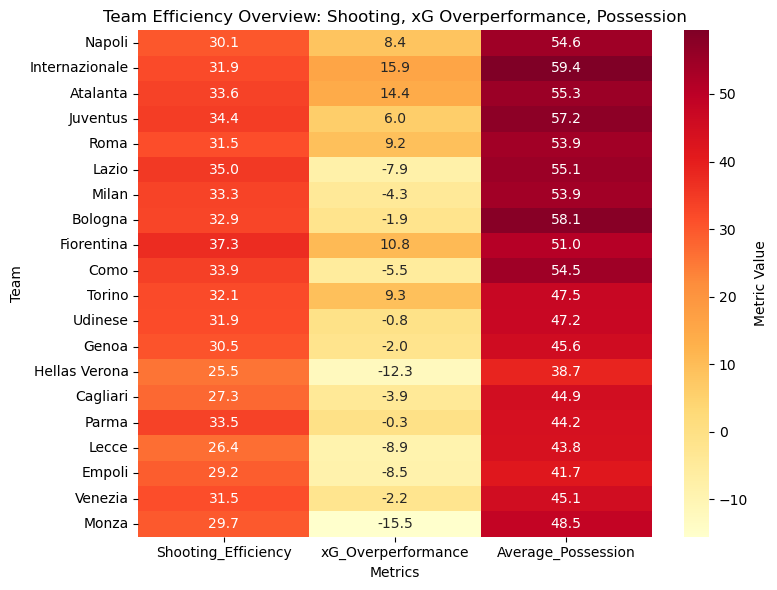

In [21]:
Shots = df['Total_Shots']
Shots_on_target = df['Total_Shots_on_Target']
df['Shooting_Efficiency'] = Shots_on_target / Shots * 100
Goal_difference = df['Goal_Difference']
df['xG_Overperformance'] = (Goal_difference) - (Expected_goals_difference)

efficiency_data = df.set_index('Team')[['Shooting_Efficiency', 'xG_Overperformance', 'Average_Possession']]

plt.figure(figsize=(8,6))
sns.heatmap(efficiency_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Metric Value'})
plt.title("Team Efficiency Overview: Shooting, xG Overperformance, Possession")
plt.xlabel("Metrics")
plt.ylabel("Team")

plt.tight_layout()
plt.show()
#plt.savefig(f'Plots/Team Efficiency Overview in Serie A {season} season.png')



The visualization highlights which teams are efficient shooters, which ones overperform or underperform their xG, and how possession fits into their playing style. We notice that the most efficient shooters is Fiorentina and the worst is Hellas Verona. As we seen before, the best overperformer is Internazionale whose goal difference is almost 16 point over the expected one and the best underperformer is Monza whose goal difference is 15.5 points less than the expected one.